# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [30]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [32]:
mnist = io.loadmat('/content/mnist-original.mat')

In [33]:
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [34]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [35]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [37]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

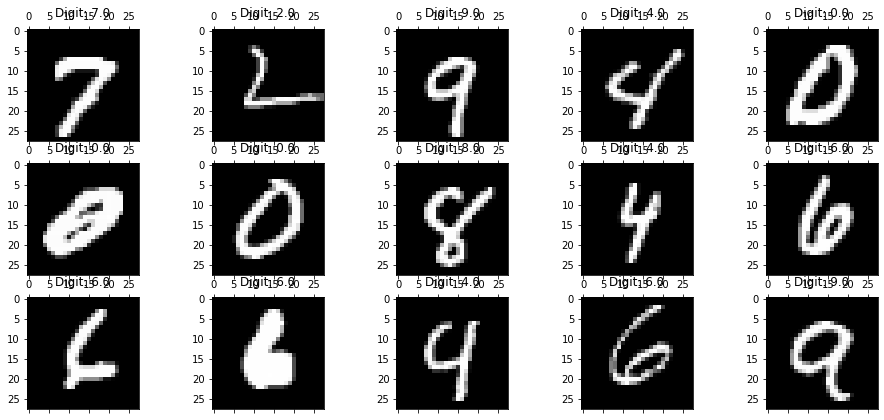

In [38]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [41]:
from sklearn.decomposition import PCA
pca = PCA() 
pca_x = pca.fit_transform(X_train)
pca_x

array([[-4.42131145e+00, -4.29460373e+00, -1.48478098e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.73494919e+00,  4.28515554e+00, -3.77109201e+00, ...,
        -8.92720809e-15, -1.47224656e-15, -1.70150862e-16],
       [-6.60276548e+00,  1.37265308e+00,  2.01466030e+00, ...,
        -7.94119353e-15,  9.44013619e-16, -6.34940216e-16],
       ...,
       [-2.30630790e+00,  5.72240568e+00, -2.00683631e+00, ...,
        -3.82885225e-15, -3.30782985e-15, -4.14481257e-16],
       [ 1.81164283e+01, -1.08507644e+01, -3.10057848e+00, ...,
        -3.85083118e-15, -3.32231552e-15, -4.10350081e-16],
       [ 1.72268119e+00,  6.34115891e+00,  8.66590270e+00, ...,
        -3.81514082e-15, -3.28671716e-15, -4.10554488e-16]])

In [43]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


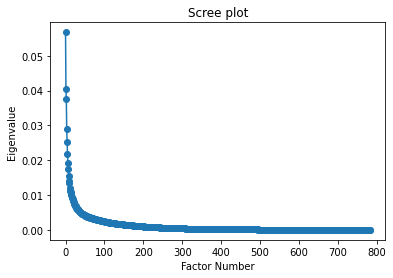

In [44]:
exp = pca.explained_variance_ratio_
plt.plot(range(len(exp)), exp, marker = 'o')
plt.title("Scree plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

In [45]:
from kneed import KneeLocator
kn = KneeLocator(range(len(exp)), exp, curve = 'convex', direction = 'decreasing')     # Elbow Point 찾기
print('Elbow Point: ',kn.knee)

Elbow Point:  44


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [47]:
exp_r = lda.explained_variance_ratio_  
exp_r

array([0.21547298, 0.19729659, 0.16274355, 0.1174505 , 0.09492474,
       0.06869791, 0.05365943, 0.04142345, 0.02995687])

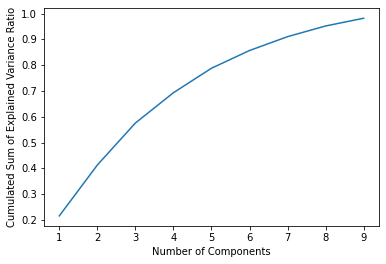

[0.21547298 0.41276957 0.57551313 0.69296362 0.78788836 0.85658627
 0.91024571 0.95166916 0.98162603]


In [48]:
exp_r_cumsum = np.cumsum(exp_r)     # 누적 설명 비중

plt.plot(list(range(1, 1+len(exp_r_cumsum))), exp_r_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()

print(exp_r_cumsum)

PCA 45개 (Elbow Point) , LDA 5개로 결정 (78%)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import time 

In [55]:
# 원본 - RF
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
end = time.time()

rf_o = rf.predict(X_test)
print('Accuracy: ', accuracy_score(rf_o, y_test))
print('Time: ', end - start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  0.9689285714285715
Time:  58.71976113319397


In [56]:
# PCA - RF

pca = PCA(n_components = 45)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
end = time.time()

rf_p = rf.predict(X_test_pca)
print('Accuracy: ', accuracy_score(rf_p, y_test))
print('Time: ', end - start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy:  0.9459285714285715
Time:  66.17154216766357


In [57]:
# LDA - RF

lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test) 

start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train)
end = time.time()

rf_l = rf.predict(X_test_lda)
print('Accuracy: ', accuracy_score(rf_l, y_test))
print('Time: ', end - start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy:  0.8463571428571428
Time:  23.501392364501953


In [60]:
# 원본 - LR
start = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
end = time.time()

lr_o = lr.predict(X_test)
print('Accuracy: ', accuracy_score(lr_o, y_test))
print('Time: ', end - start)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9172142857142858
Time:  66.5418267250061


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [61]:
# PCA - LR

pca = PCA(n_components = 45)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start = time.time()
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
end = time.time()

lr_p = lr.predict(X_test_pca)
print('Accuracy: ', accuracy_score(lr_p, y_test))
print('Time: ', end - start)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9050714285714285
Time:  8.421723127365112


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [62]:
# LDA - LR

lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test) 

start = time.time()
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
end = time.time()

lr_l = lr.predict(X_test_lda)
print('Accuracy: ', accuracy_score(lr_l, y_test))
print('Time: ', end - start)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8279285714285715
Time:  7.69239616394043


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
